In [3]:
using PyPlot
using QuantumOptics
include("../src/ColdAtoms.jl");
using .ColdAtoms

┌ Warning: Replacing docs for `Main.ColdAtoms.Ω :: NTuple{4, Any}` in module `Main.ColdAtoms`
└ @ Base.Docs docs/Docs.jl:243


In [4]:
using DSP
using Interpolations
using LaTeXStrings

In [31]:
using PyCall
@pyimport numpy as np

In [4]:
w0 = 1.0;
wr0 = 2.5;
λ0 = 0.812;
λr = 0.795;
z0 = w0_to_z0(w0, λ0);
zr0 = w0_to_z0(wr0, λr);
R0 = 3.0; #distance between atoms

U0 = 340.0;
kT = 50.0 * sqrt(340/1000);
m = 86.9;

Ωr0 = 2.0*π * 0.3;
Δ0 = 2π * 50e3;

atom_params = [m, kT];
trap_params = [U0, w0, z0];

#Samples
N = 1000;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000, harmonic=true);

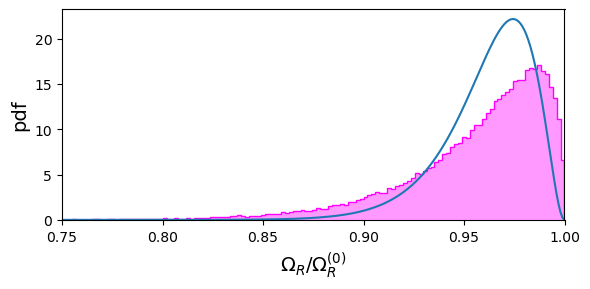

In [29]:
function Ω_raman(x, y, z, laser_params)
    Ω0, w0, z0 = laser_params;
    return Ω0 .* I(x, y, z, w0, z0);
end;


function boltzman(x, sigma)
    return (x .^2) .* exp.(-x / (2.0 * sigma ^ 2))
end;

laser_params = [1.0, 1.5, w0_to_z0(1.5, λr)];
Ω_list = [];
for s in samples
    push!(Ω_list, Ω_raman(s[1], s[2], s[3], laser_params))
end;

Ω_cont = [0.5:0.001:1.0;];

figure(figsize=(6,3))
hist(Ω_list, bins=200, density=true, color="magenta", alpha=0.4, rasterized=true)
hist(Ω_list, bins=200, density=true, color="magenta", alpha=1.0, rasterized=true, histtype="step")
plot(Ω_cont, boltzman(1.0 .- Ω_cont, 0.08)*250000)

tight_layout()
xlim(0.75, 1.0)
xlabel(L"\Omega_{R}/\Omega_{R}^{(0)}", fontsize=14)
ylabel("pdf", fontsize=14)
tight_layout()
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Диплом/main/images/non_monochromatic.pdf", dpi=500)
gcf()

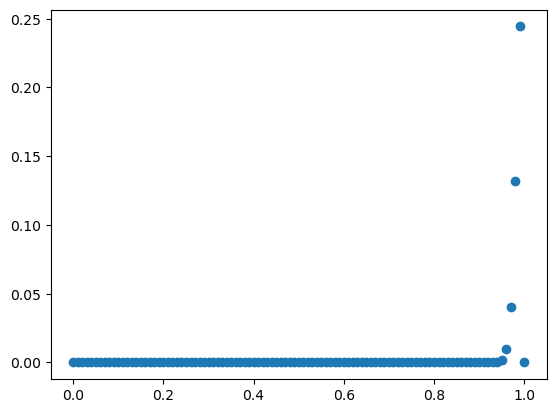

In [14]:
figure()
scatter(Ω_cont, boltzman(1.0 .- Ω_cont, 0.05))
gcf()

In [92]:
function StarkMeasure(Δ, Ω, τ)
    return (sin.(τ*sqrt.(Δ .^2 + Ω^2)/2.0) .^2) ./ (1.0 .+ (Δ/Ω) .^2)
end

StarkMeasure (generic function with 1 method)

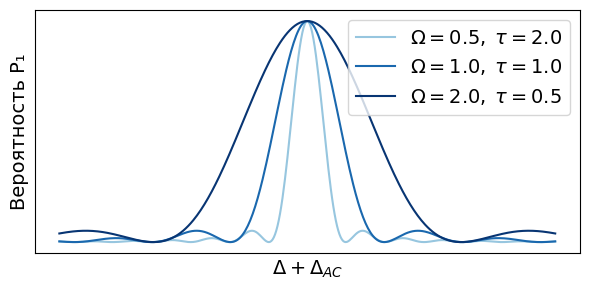

In [127]:
delta_list = [-20.0:0.1:20.0;];
cm = get_cmap(:Blues)

figure(figsize=(6,3))

plot(delta_list, StarkMeasure.(delta_list, 0.5, 2.0), color=cm(100), label=L"\Omega = 0.5, \; \tau = 2.0")
plot(delta_list, StarkMeasure.(delta_list, 1.0, 1.0), color=cm(200), label=L"\Omega = 1.0, \; \tau = 1.0")
plot(delta_list, StarkMeasure.(delta_list, 2.0, 0.5), color=cm(250), label=L"\Omega = 2.0, \; \tau = 0.5")

xticks([])
yticks([])

xlabel(L"\Delta + \Delta_{AC}", fontsize=14)
ylabel("Вероятность P₁", fontsize=14)
legend(fontsize=14)
tight_layout()

savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Диплом/main/images/Stark_measure_drawing.pdf")
gcf()

UndefVarError: UndefVarError: `cm` not defined

In [34]:
phase(t) = 0.0;

wr = 1.5
zr = w0_to_z0(wr, λr);
Ω = 2.0*π*1.0;
T = 2.0*π/Ω;
laser_params_1 = [Ω, wr, zr];
laser_params_2 = [Ω, 3.0, w0_to_z0(3.0, λr)];

basis_r = NLevelBasis(2);
g_r = nlevelstate(basis_r, 1);
e_r = nlevelstate(basis_r, 2);
ψ0 = g_r;
ne = e_r ⊗ dagger(e_r);

tspan = [0.0:T/20:10*T;];

ρ_mean_1, ρ2_mean = simulation_raman(
        tspan, ψ0, 
            
        atom_params,
        laser_params_1,
        trap_params,

        samples,
        phase
    )

ρ_mean_2, ρ2_mean = simulation_raman(
    tspan, ψ0, 
        
    atom_params,
    laser_params_2,
    trap_params,

    samples,
    phase
)

(Operator{NLevelBasis{Int64}, NLevelBasis{Int64}, Matrix{ComplexF64}}[Operator(dim=2x2)
  basis: NLevel(N=2)
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.976001+0.0im             0.0+0.153037im
      0.0-0.153037im  0.0239985+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.90631+0.0im             0.0+0.291382im
     0.0-0.291382im  0.0936899+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.797618+0.0im            0.0+0.401751im
      0.0-0.401751im  0.202382+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.660361+0.0im           0.0+0.47355im
      0.0-0.47355im  0.339639+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.50772+0.0im           0.0+0.499886im
     0.0-0.499886im  0.49228+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.354351+0.0im            0.0+0.478234im
      0.0-0.478234im  0.645649+0.0im, Operator(dim=2x2)
  basis: NLevel(N=2)
 0.214978+0.0im            0.0+0.410677im
      0.0-0.410677im  0.785022+0.0im, Operator(dim=2x2)


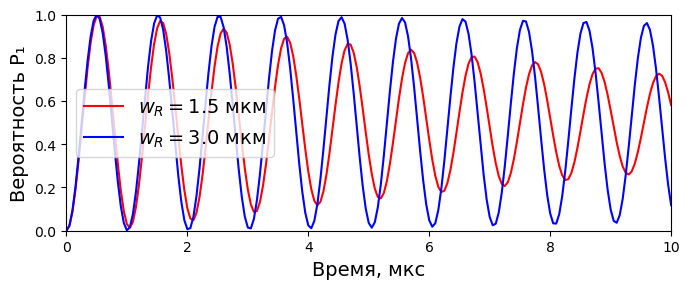

In [54]:
figure(figsize=(7,3))
plot(tspan, real(expect(ne, ρ_mean_1)), color="red", label=L"w_{R}=1.5 \text{ мкм}")
plot(tspan, real(expect(ne, ρ_mean_2)), color="blue", label=L"w_{R}=3.0 \text{ мкм}")
xlabel("Время, мкс", fontsize=14)
ylabel("Вероятность P₁", fontsize=14)
xlim(0.0, maximum(tspan))
ylim(0.0, 1.0)
legend(fontsize=14)
tight_layout()

savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Диплом/main/images/rabi_sample.pdf")
gcf()

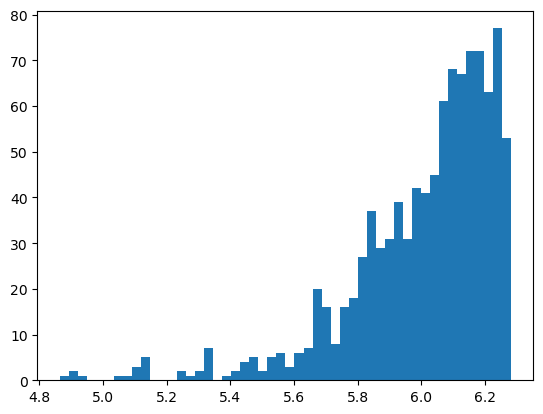

### Функции для моделирования BB1

In [9]:
function heaviside(t)
    0.5 * (sign.(t) .+ 1.0)
 end

function interval(t, a, b)
   heaviside(t .- a) - heaviside(t .- b)
end

function phase(t, ξ, θ, Ω; delay=1.0)
   ϕ = acos(-θ / (4π));
   return ϕ * (interval(t,-delay* π/Ω,π/Ω) + 3.0 * interval(t, π/Ω,3π/Ω) + interval(t, 3π/Ω,4π/Ω)) .+ ξ;
end


function tspan(Ω; theta=π)
   pi_time = π / Ω
   full_time = (4.0 + theta/π) * pi_time;
   return [0.0:full_time/10:full_time;]
end;


function Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
   return Ωr0 * (wr0/wr)^2 * (Δ0/Δ)
end;

function timespan_BB1(wr, Δ, Ωr0, wr0, Δ0; theta=π)
   Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
   full_time = (4.0 + theta/π) * pi_time;
   return [0.0:full_time/10:full_time;]
end;

function phase_BB1(t, wr, Δ, Ωr0, wr0, Δ0, θ=π, ϕ=0.0)
   Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
   return phase(t, ϕ, θ, Ωr)
end;


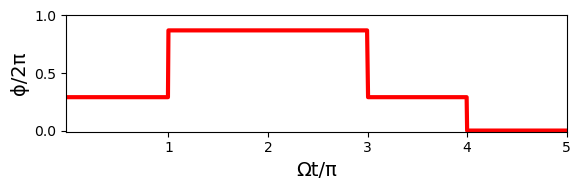

In [9]:
wr = 3.0

BB1X_phase(t) = phase_BB1(t, wr, 50e3, 2π*0.133, 6.0, 50e3)
T = timespan_BB1(wr, 50e3, 2π*0.133, 6.0, 50e3)[end];
tspan = T*[-0.2:0.001:1.0;];

figure(figsize=(6,2))
plot(5 * tspan/T,  BB1X_phase(tspan)/(2π), linewidth=3, color="red")
# plot(5 * tspan/T, ((BB1X_phase(tspan) .+ π/2) .% (2π))/(2π), linewidth=3, color="red")
xlim(-0.025, T)
ylim(-0.01, 1)


ylabel("ϕ/2π", fontsize=14)
xlabel("Ωt/π", fontsize=14)
xticks([1,2,3,4,5])
tight_layout()
# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/images/BB1_phase_Y.pdf")
gcf()

### Моделирование BB1 со сглаживанием

In [7]:
function G(t, σ)
    return exp.(-t .^2 / (2.0 * σ^2))/(sqrt(2.0*π*σ))
end

function phase_smooth(σ)
    dt = 0.0001
    tspan = [-1.0:dt:5.0;];

    signal = phase(tspan, 0.0, π, π)
    kernel = G(tspan, σ)

    l = length(tspan)
    shift = Int((l-1)/6)
    res = conv(signal, kernel)
    res = maximum(signal) * res / maximum(res)
    res = res[1+shift:l+shift]

    nodes = -1.0:dt:5.0;
    itp = interpolate(res, BSpline(Cubic(Line(OnGrid()))))
    res_itp = scale(itp, nodes)
    return res_itp
end

phase_smooth (generic function with 1 method)

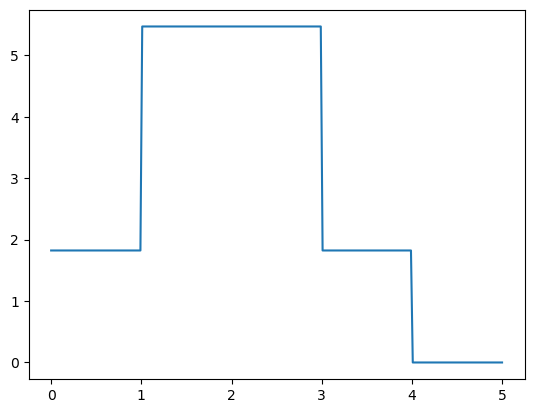

In [8]:
dt = 0.01
tspan = [0.0:dt:5.0;];

figure()
plot(tspan, phase_smooth(0.0001)(tspan))
gcf()

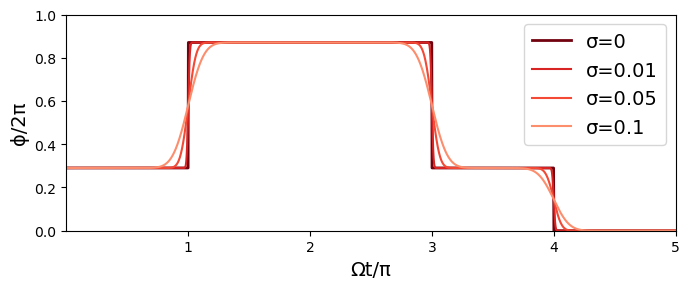

In [48]:
tspan = [-1.0:0.001:5.0;];
signal = phase(tspan, 0.0, π, π)

figure(figsize=(7,3))

xlim(0.0, 5.0)
ylim(0.0, 1.0)

cm = get_cmap(:Reds)
plot(tspan, signal / 2π, color=cm(250), linewidth=2, label="σ=0")
plot(tspan, phase_smooth(0.01)(tspan) / 2π, color=cm(180), label="σ=0.01")
plot(tspan, phase_smooth(0.05)(tspan) / 2π, color=cm(150), label="σ=0.05")
plot(tspan, phase_smooth(0.1)(tspan) / 2π, color=cm(100), label="σ=0.1")
legend(fontsize=14)


ylabel("ϕ/2π", fontsize=14)
xlabel("Ωt/π", fontsize=14)
xticks([1,2,3,4,5])
tight_layout()

# savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/images/phase_smoothed.pdf")
gcf()

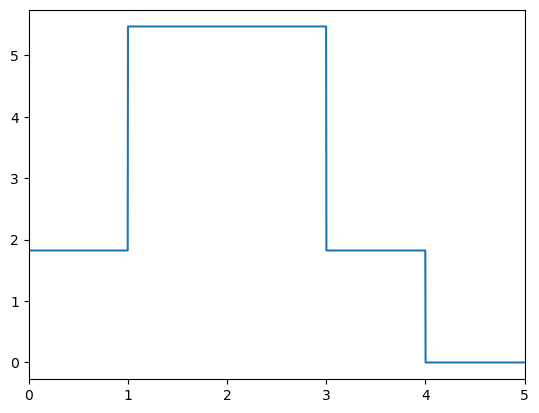

In [58]:
figure()
plot(tspan, phase_smooth(0.0001)(tspan))
xlim(0.0, 5.0)
gcf()

In [22]:
1e-3

0.001

In [29]:
wr = 1.5;
# σ_list = [0.001:0.01:0.2;];
σ_list = 10.0 .^ [-6:1:-1;];
Δ = 2.0 * π * 50e3;
Ωr0 = 2.0*π * 2.0;
Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
zr = w0_to_z0(wr, λr)
laser_params = [Ωr, wr, zr];

BB1_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0);
T = maximum(BB1_tspan) / 5.0;

basis_r = NLevelBasis(2);
g_r = nlevelstate(basis_r, 1);
e_r = nlevelstate(basis_r, 2);
ψ0 = g_r;
ne = e_r ⊗ dagger(e_r);

res_BB1_1    = [];

for σ in σ_list
    BB1_phase(t) = phase_smooth(σ)(t/T)

    ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
        BB1_tspan, ψ0, 
            
        atom_params,
        laser_params,
        trap_params,

        [zeros(6)],
        BB1_phase
    )
    infidelity = 1.0 - real(expect(ne, ρ_mean_BB1[end]))
    push!(res_BB1_1, infidelity)
end

In [28]:
σ_list = 10.0 .^ [-6:1:-1;]

6-element Vector{Float64}:
 1.0e-6
 1.0e-5
 0.0001
 0.001
 0.010000000000000002
 0.1

In [24]:
σ_list = 10.0 .^ [-6]

1-element Vector{Float64}:
 1.0e-6

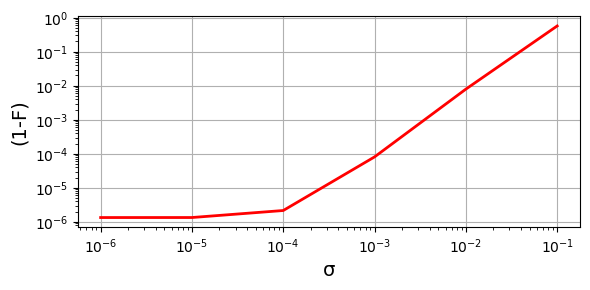

In [33]:
figure(figsize=(6,3))
plot(σ_list, res_BB1_1, color="red", linewidth=2)
yscale("log")
xscale("log")
xlabel("σ", fontsize=14)
ylabel("(1-F)", fontsize=14)

grid()
tight_layout()
savefig("/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/images/BB1_sigma.pdf")
gcf()

### Тепловая карта для $\Omega = 2\pi \times 0.3 \text{ MHz}$

In [6]:
wr_list = [1.0:0.1:3.0;];
Δ_list = 2.0 * π * [25e3:2.5e3:75e3;];
Ωr0 = 2.0*π * 0.3;

basis_r = NLevelBasis(2);
g_r = nlevelstate(basis_r, 1);
e_r = nlevelstate(basis_r, 2);
ψ0 = g_r;
ne = e_r ⊗ dagger(e_r);

res_simple = [];
res_simple_cross = [];

res_BB1    = [];
res_BB1_cross    = [];

for Δ in Δ_list
    temp_simple       = [];
    temp_simple_cross = [];

    temp_BB1          = [];
    temp_BB1_cross    = [];

    for wr in wr_list
        Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
        zr = w0_to_z0(wr, λr)
        laser_params = [Ωr, wr, zr];


        BB1_phase(t) = phase_BB1(t, wr, Δ, Ωr0, wr0, Δ0);
        BB1_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0);

        simple_tspan = [0.0:π/Ωr/10:π/Ωr;];
        simple_phase(t) = 0.0;


        ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase
        )

        ρ_mean_BB1_cross, ρ2_mean_BB1_cross = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase;
            distance=R0
        )



        ρ_mean_simple, ρ2_mean_simple = simulation_raman(
            simple_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            simple_phase
        )

        ρ_mean_simple_cross, ρ2_mean_simple_cross = simulation_raman(
            simple_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            simple_phase;
            distance=R0
        )
        push!(temp_simple, 1.0 - real(expect(ne, ρ_mean_simple[end])))
        push!(temp_simple_cross, real(expect(ne, ρ_mean_simple_cross[end])))
        push!(temp_BB1, 1.0 - real(expect(ne, ρ_mean_BB1[end])))
        push!(temp_BB1_cross, real(expect(ne, ρ_mean_BB1_cross[end])))
    end
    push!(res_simple, temp_simple)
    push!(res_simple_cross, temp_simple_cross)
    push!(res_BB1, temp_BB1)
    push!(res_BB1_cross, temp_BB1_cross)
end

In [33]:
path = "/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/data/"

# np.save(path * "res_simple.npy", PyObject(res_simple), allow_pickle=false)
# np.save(path * "res_simple_cross.npy", PyObject(res_simple_cross), allow_pickle=false)
# np.save(path * "res_BB1.npy", PyObject(res_BB1), allow_pickle=false)
# np.save(path * "res_BB1_cross.npy", PyObject(res_BB1_cross), allow_pickle=false)

"/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/data/"

In [38]:
np.load(path * "res_simple.npy")[0,1:end]

BoundsError: BoundsError: attempt to access 21×21 Matrix{Float64} at index [0, 1:21]

### Тепловая карта для $\Omega = 2\pi \times 1.0 \text{ MHz}$

In [17]:
Ωr0 = 2.0*π * 1.0;
res_BB1_1    = [];
res_BB1_1_cross    = [];

for Δ in Δ_list
    temp_BB1_1         = [];
    temp_BB1_1_cross    = [];

    for wr in wr_list
        Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
        zr = w0_to_z0(wr, λr)
        laser_params = [Ωr, wr, zr];


        BB1_phase(t) = phase_BB1(t, wr, Δ, Ωr0, wr0, Δ0);
        BB1_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0);


        ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase
        )

        ρ_mean_BB1_cross, ρ2_mean_BB1_cross = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase;
            distance=R0
        )
        push!(temp_BB1_1, 1.0 - real(expect(ne, ρ_mean_BB1[end])))
        push!(temp_BB1_1_cross, real(expect(ne, ρ_mean_BB1_cross[end])))
    end
    push!(res_BB1_1, temp_BB1_1)
    push!(res_BB1_1_cross, temp_BB1_1_cross)
end

### Тепловая карта для $\Omega = 2\pi \times 5 \text{ MHz}$

In [24]:
Ωr0 = 2.0*π * 5.0;
res_BB1_1    = [];
res_BB1_1_cross    = [];

for Δ in Δ_list
    temp_BB1_1         = [];
    temp_BB1_1_cross    = [];

    for wr in wr_list
        Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
        zr = w0_to_z0(wr, λr)
        laser_params = [Ωr, wr, zr];


        BB1_phase(t) = phase_BB1(t, wr, Δ, Ωr0, wr0, Δ0);
        BB1_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0);


        ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase
        )

        ρ_mean_BB1_cross, ρ2_mean_BB1_cross = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase;
            distance=R0
        )
        push!(temp_BB1_1, 1.0 - real(expect(ne, ρ_mean_BB1[end])))
        push!(temp_BB1_1_cross, real(expect(ne, ρ_mean_BB1_cross[end])))
    end
    push!(res_BB1_1, temp_BB1_1)
    push!(res_BB1_1_cross, temp_BB1_1_cross)
end

### Ошибки из-за теплового движения от $w_r$ для разных $\Omega$ при фиксированном $\Delta$

In [38]:
wr_list = [1.0:0.1:3.0;];
Ωr0_list = 2.0 * π * [0.3, 1.0, 2.0, 5.0];
Δ = 2.0 * π * 50.0e3;

res_simple    = [];
res_simple_cross    = [];


for Ωr0 in Ωr0_list
    temp_simple    = [];
    temp_simple_cross    = [];
    for wr in wr_list
        Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
        zr = w0_to_z0(wr, λr)
        laser_params = [Ωr, wr, zr];

        simple_phase(t) = 0.0;
        simple_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0)/5.0;

        ρ_mean_simple, ρ2_mean_simple = simulation_raman(
            simple_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            simple_phase
        )

        ρ_mean_simple_cross, ρ2_mean_simple_cross = simulation_raman(
            simple_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            simple_phase;
            distance=R0
        )
        push!(temp_simple, 1.0 - real(expect(ne, ρ_mean_simple[end])))
        push!(temp_simple_cross, real(expect(ne, ρ_mean_simple_cross[end])))
    end
    push!(res_simple, temp_simple)
    push!(res_simple_cross, temp_simple_cross)
end

In [42]:
np.save(path * "simple.npy", PyObject(res_simple), allow_pickle=false)
np.save(path * "simple_cross.npy", PyObject(res_simple_cross), allow_pickle=false)

In [42]:
wr_list = [1.0:0.1:3.0;];
Ωr0_list = 2.0 * π * [0.3, 1.0, 2.0, 5.0];
Δ = 2.0 * π * 50.0e3;

res_simple = np.load(path * "simple.npy")

21-element Vector{Float64}:
 0.043951564939159304
 0.029358177676657715
 0.020235156022614942
 0.01435821780663371
 0.010456393934695662
 0.007791265863996588
 0.0059231266622706835
 0.004582860611376027
 0.0036011643133794236
 0.0028686926403175272
 ⋮
 0.0015516282436290885
 0.0012881341547884562
 0.0010778006629721393
 0.0009082282123743513
 0.0007702721879866425
 0.0006571014497580574
 0.0005635516480284597
 0.0004856755380684419
 0.00042042574391720766

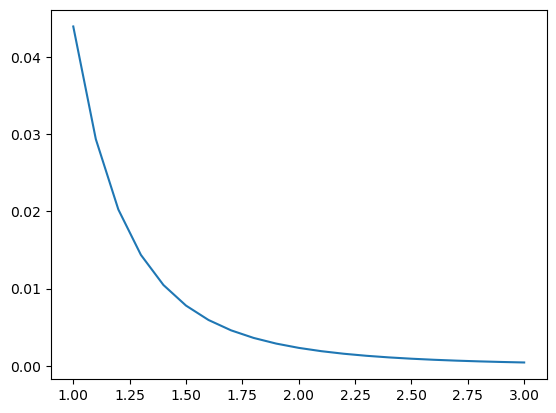

In [46]:
figure()
plot(wr_list, res_simple[1,1:end])
gcf()

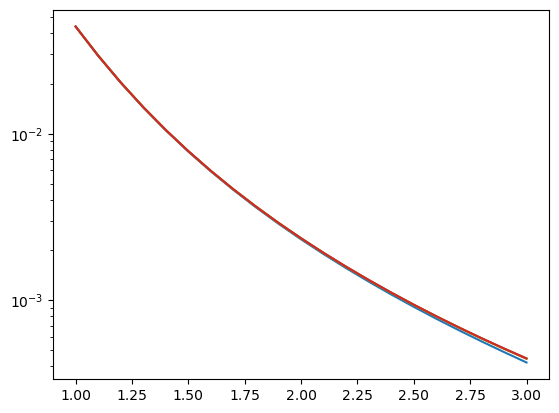

In [47]:
figure()
for i in [1:4;]
    plot(wr_list, res_simple[i,1:end])
end
yscale("log")
gcf()

In [48]:
path

"/Users/goloshch/Desktop/Materials/QOTLabs/Деловое/Отчет_24/data/"

In [ ]:
theta_list = [0.0:0.1:1.9;] * 2*π;


res = [];
for theta in theta_list
    Ωr = Ωr_calculate(wr, Δ, Ωr0, wr0, Δ0)
    zr = w0_to_z0(wr, λr)
    laser_params = [Ωr, wr, zr];

    BB1_phase(t) = phase_BB1(t, wr, Δ, Ωr0, wr0, Δ0, θ=theta, ϕ=0.0);
    BB1_tspan = timespan_BB1(wr, Δ, Ωr0, wr0, Δ0);

    ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
        BB1_tspan, ψ0, 
            
        atom_params,
        laser_params,
        trap_params,

        samples,
        BB1_phase
    )
    push!(temp_BB1_1, 1.0 - real(expect(ne, ρ_mean_BB1[end])))
end

### Скан BB1 от pi_time

In [35]:
w0 = 1.0;
wr0 = 1.5;
λ0 = 0.812;
λr = 0.795;
z0 = w0_to_z0(w0, λ0);
zr0 = w0_to_z0(wr0, λr);
R0 = 3.0; #distance between atoms

U0 = 340.0;
kT = 30.0;
m = 86.9;

Ωr0 = 2.0*π * 5.0;
Δ0 = 2π * 50e3;

atom_params = [m, kT];
trap_params = [U0, w0, z0];


basis_r = NLevelBasis(2);
g_r = nlevelstate(basis_r, 1);
e_r = nlevelstate(basis_r, 2);
ψ0 = g_r;
ne = e_r ⊗ dagger(e_r);

#Samples
N = 1000;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000, harmonic=true);

In [36]:
delta_list = [-0.9:0.05:0.9;];

res = [];
res_error = [];
laser_params = [Ωr0, wr0, zr0];

for delta in delta_list
    BB1_phase(t) = phase(t, 0.0, π, Ωr0/(1.0+delta));
    BB1_tspan = tspan(Ωr0/(1.0+delta));

    ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
        BB1_tspan, ψ0, 
            
        atom_params,
        laser_params,
        trap_params,

        samples,
        BB1_phase
    )
    val =  1.0 - real(expect(ne, ρ_mean_BB1[end]));
    std =  sqrt(real(expect(ne, ρ2_mean_BB1[end])) -  real(expect(ne, ρ_mean_BB1[end]))^2);

    push!(res, val)
    push!(res_error, std)
end;

res_error = res_error ./ sqrt(length(res_error))

37-element Vector{Float64}:
 0.0447821682347461
 0.062134372863871454
 0.07431947624550535
 0.08086626262405405
 0.08201509562462689
 0.07856875261755206
 0.07167086523416749
 0.06257380161175234
 0.052446932118199986
 0.042253121968799726
 ⋮
 0.03484787044801816
 0.044561790160724056
 0.05472651142415515
 0.06458555520249712
 0.0731688949906874
 0.0793779718787318
 0.08213881641590004
 0.08061551074037858
 0.07446039985174696

In [49]:
figure()
hist(convert(Array{Float64}, samples[1:end,1]))
gcf()

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


MethodError: MethodError: Cannot `convert` an object of type Vector{Float64} to an object of type Float64

Closest candidates are:
  convert(::Type{T}, !Matched::ColorTypes.Gray24) where T<:Real
   @ ColorTypes ~/.julia/packages/ColorTypes/vpFgh/src/conversions.jl:114
  convert(::Type{T}, !Matched::ColorTypes.Gray) where T<:Real
   @ ColorTypes ~/.julia/packages/ColorTypes/vpFgh/src/conversions.jl:113
  convert(::Type{T}, !Matched::Unitful.Gain) where T<:Real
   @ Unitful ~/.julia/packages/Unitful/R4J37/src/logarithm.jl:62
  ...


In [67]:
temp_x = [];
temp_vx = [];

for s in samples
    push!(temp_x, s[1])
    push!(temp_vx, s[4])
end;

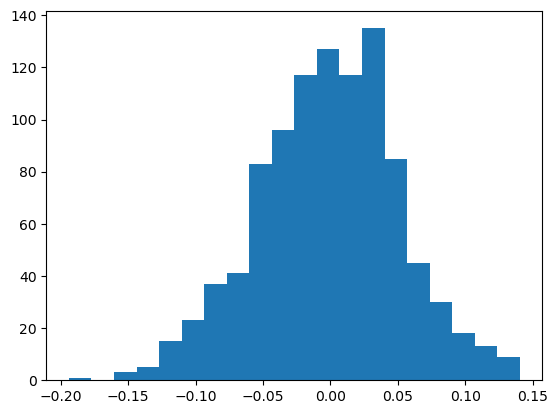

In [69]:
figure()
hist(temp_vx, bins=20)
gcf()

In [71]:
sqrt(1.38 * 10^(-23) * 30 * 10^(-6) / (1.67 * 10^(-27) * 87))

0.05338045959767847

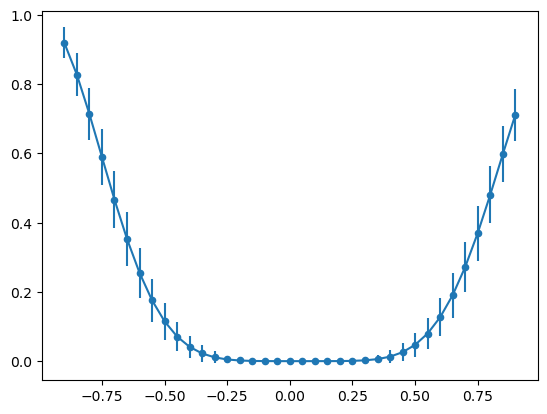

In [38]:
figure()
scatter(delta_list, res,s=20)
errorbar(delta_list, res, yerr=res_error)
gcf()

### Проверка зависимости $(1-F) = \frac{kT}{U_0}\left(\frac{w_0}{w_R}\right)^2$

In [74]:
w0 = 1.0;
λ0 = 0.812;
λr = 0.795;
z0 = w0_to_z0(w0, λ0);
R0 = 3.0; #distance between atoms

U0 = 340.0;
m = 86.9;

Ωr0 = 2.0*π * 1.0;
Δ0 = 2π * 50e3;

trap_params = [U0, w0, z0];

basis_r = NLevelBasis(2);
g_r = nlevelstate(basis_r, 1);
e_r = nlevelstate(basis_r, 2);
ψ0 = g_r;
ne = e_r ⊗ dagger(e_r);

#Samples
N = 1000;

In [86]:
T_list = [2.5:2.5:50.0;];
wr0 = 1.5;
zr0 = w0_to_z0(wr0, λr);

res = [];
res_error = [];

for T in T_list
    atom_params = [m, T];
    laser_params = [Ωr0, wr0, zr0];

    N = 4000
    samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000, harmonic=true);

    BB1_phase(t) = 0.0;
    BB1_tspan = tspan(Ωr0) / 5.0;

    ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
        BB1_tspan, ψ0, 
            
        atom_params,
        laser_params,
        trap_params,

        samples,
        BB1_phase
    )
    val =  1.0 - real(expect(ne, ρ_mean_BB1[end]));
    std =  sqrt(real(expect(ne, ρ2_mean_BB1[end])) -  real(expect(ne, ρ_mean_BB1[end]))^2);

    push!(res, val)
    push!(res_error, std)
end;

res_error = res_error ./ sqrt(N)

20-element Vector{Float64}:
 0.00012606624503965278
 0.000253553432771448
 0.0003838188347568585
 0.0005034737070058105
 0.0006396171351475113
 0.0007551930202984036
 0.0008720017884122105
 0.0010016257303491125
 0.001091893010209641
 0.001232419712584455
 0.001325152432136266
 0.0014670085075462462
 0.0015173381099465564
 0.0016658443428067234
 0.0017538233727600703
 0.0018495435793851377
 0.0019827001140415466
 0.0020720939103002654
 0.002139736487354496
 0.0022563414920369037

In [ ]:
figure()
errorbar(T_list, res, yerr=res_error)
plot(T_list, 0.5*T_list / U0 * (w0/wr0)^2)
gcf()

In [116]:
wr0_list = [1.0:0.2:5.0;];
T_list = [5.0:5.0:40.0;];

res = [];
res_error = [];

for T in T_list
    temp = [];
    temp_error = [];
    for wr0 in wr0_list
        atom_params = [m, T];

        zr0 = w0_to_z0(wr0, λr);
        laser_params = [Ωr0, wr0, zr0];

        N = 4000
        samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000, harmonic=true);

        BB1_phase(t) = 0.0;
        BB1_tspan = tspan(Ωr0) / 5.0;

        ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase
        )
        val =  1.0 - real(expect(ne, ρ_mean_BB1[end]));
        std =  sqrt(real(expect(ne, ρ2_mean_BB1[end])) - real(expect(ne, ρ_mean_BB1[end]))^2);

        temp_error = temp_error ./ sqrt(N)
        push!(temp, val)
        push!(temp_error, std)
    end;
    push!(res, temp)
    push!(res_error, temp_error)
end;

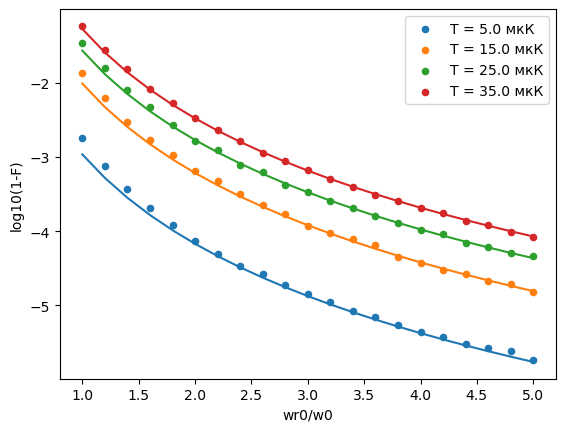

In [142]:
figure()

for i in [1:2:length(T_list);]
    scatter(wr0_list / w0, log10.(res[i]), s=20, label="T = " * string(T_list[i]) * " мкК")
    # errorbar(wr0_list, res, yerr=res_error, linestyle=" ")
    plot(wr0_list / w0, log10.(5*(T_list[i]/U0)^2 * (w0 ./ wr0_list) .^4))
end;


xlabel("wr0/w0")
ylabel("log10(1-F)")

legend()
gcf()

In [143]:
wr0_list = [1.0:0.2:5.0;];
T_list = [5.0:5.0:40.0;];

res3 = [];
res3_error = [];

for T in T_list
    temp = [];
    temp_error = [];
    for wr0 in wr0_list
        atom_params = [m, T];

        zr0 = w0_to_z0(wr0, λr);
        laser_params = [Ωr0, wr0, zr0];

        N = 4000
        samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000, harmonic=true);

        BB1_phase(t) = 0.0;
        BB1_tspan = 3.0 * tspan(Ωr0) / 5.0;

        ρ_mean_BB1, ρ2_mean_BB1 = simulation_raman(
            BB1_tspan, ψ0, 
                
            atom_params,
            laser_params,
            trap_params,

            samples,
            BB1_phase
        )
        val =  1.0 - real(expect(ne, ρ_mean_BB1[end]));
        std =  sqrt(real(expect(ne, ρ2_mean_BB1[end])) - real(expect(ne, ρ_mean_BB1[end]))^2);

        temp_error = temp_error ./ sqrt(N)
        push!(temp, val)
        push!(temp_error, std)
    end;
    push!(res3, temp)
    push!(res3_error, temp_error)
end;

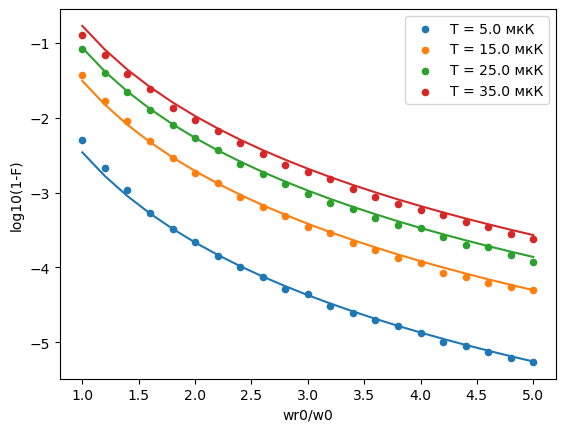

In [198]:
# new_res = sqrt.(res3 / res)

figure()
for i in [1:2:length(T_list);]
    scatter(wr0_list / w0, log10.(1.0 .- (1.0 .- res3[i]) .^ (1/3)), s=20, label="T = " * string(T_list[i]) * " мкК")
    # scatter(wr0_list / w0, log10.(res[i]), s=20, label="T = " * string(T_list[i]) * " мкК")
    # errorbar(wr0_list, res, yerr=res_error, linestyle=" ")
    plot(wr0_list / w0, log10.(16*(T_list[i]/U0) .^2 * (w0 ./ wr0_list) .^4))
end;

xlabel("wr0/w0")
ylabel("log10(1-F)")

legend()
gcf()



In [177]:
i = 1
(res3[i]) .^ (1/3)

21-element Vector{Float64}:
 0.24812018064664867
 0.18603892100397323
 0.14778932746056012
 0.11689458338229108
 0.09953491688933597
 0.08667855123015408
 0.0755650616063545
 0.06728746040806968
 0.060529657164278446
 0.05379708923764054
 ⋮
 0.04181259603322361
 0.03917279327574086
 0.03668075555793897
 0.034107252242532304
 0.03132148632974418
 0.029862145212673795
 0.028225881300588042
 0.026527382367948032
 0.025403751587645622